In [1]:
from braincoder.models import GaussianPRF
import pandas as pd
import numpy as np
import seaborn as sns

In [52]:


keys = ['H1A (closely-spaced RFs for narrow range)', 'H1B (wide-spaced RFs for wide range)',
        'H2A (narrow RFs for narrow range)', 'H2B (wide RFs for wide range)',
        'H3A (lower amplitudes for narrow range)', 'H3B (higher amplitudes for wide range)']

parameters_H1a = pd.DataFrame({'mu':np.linspace(10, 25, 5)[1:-1], 'sd':np.ones(3)*5., 'amplitude':1.0, 'baseline':0.0})
parameters_H1b = pd.DataFrame({'mu':np.linspace(10, 40, 5)[1:-1], 'sd':np.ones(3)*5., 'amplitude':1.0, 'baseline':0.0})

parameters_H2a = pd.DataFrame({'mu':np.linspace(10, 40, 5)[1:-1], 'sd':np.ones(3)*5., 'amplitude':1.0, 'baseline':0.0})
parameters_H2b = pd.DataFrame({'mu':np.linspace(10, 40, 5)[1:-1], 'sd':np.ones(3)*10., 'amplitude':1.0, 'baseline':0.0})

parameters_H3a = pd.DataFrame({'mu':np.linspace(10, 40, 5)[1:-1], 'sd':np.ones(3)*5., 'amplitude':1.0, 'baseline':0.0})
parameters_H3b = pd.DataFrame({'mu':np.linspace(10, 40, 5)[1:-1], 'sd':np.ones(3)*5., 'amplitude':1.5, 'baseline':0.0})

parameters = pd.concat((parameters_H1a, parameters_H1b, parameters_H2a, parameters_H2b, parameters_H3a, parameters_H3b), keys=keys, names=['hypothesis'])

In [53]:
pred = []
for hypothesis, pars in parameters.groupby('hypothesis'):

    model = GaussianPRF(parameters=parameters, paradigm=np.linspace(10, 40, 100))
    p = model.predict()
    p.index = pd.Index(np.linspace(10, 40, 100), name='stimulus')
    p.columns.name = 'rf'

    pred.append(p)

pred = pd.concat(pred) 

In [54]:
pred = pred.stack([0, 1]).to_frame('activity')
pred.index.set_names('rf', level=-1, inplace=True)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_36263/3059062845.py:1: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  g = sns.relplot(x='stimulus', hue='rf', palette=['k'], y='activity', col='hypothesis', data=pred.reset_index(), kind='line', col_wrap=3, legend=False, aspect=1.5, height=2.5,


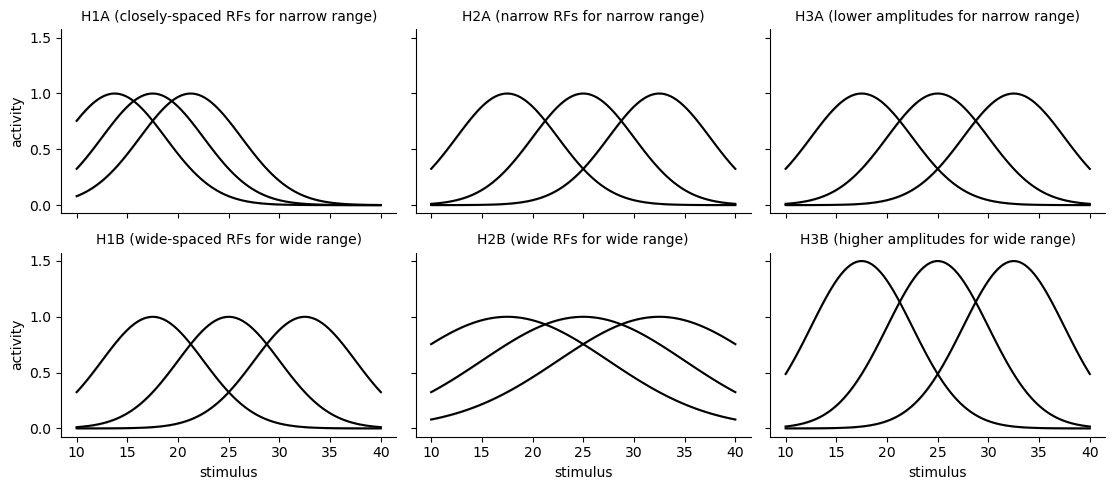

In [55]:
g = sns.relplot(x='stimulus', hue='rf', palette=['k'], y='activity', col='hypothesis', data=pred.reset_index(), kind='line', col_wrap=3, legend=False, aspect=1.5, height=2.5,
                col_order=['H1A (closely-spaced RFs for narrow range)', 'H2A (narrow RFs for narrow range)', 'H3A (lower amplitudes for narrow range)',
                            'H1B (wide-spaced RFs for wide range)', 'H2B (wide RFs for wide range)', 'H3B (higher amplitudes for wide range)'])

g.set_titles('{col_name}')